We need to generate a network with population units. Please run the ```population_unit_network.ipynb``` example notebook first.

In [1]:
import os
from snudda.input import SnuddaInput
network_path = os.path.join("networks","population_unit_network")
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("input_config","simple-input-3.json"),
                 verbose=True)
si.generate()

Time = 10.0
Using hdf5 version latest
Loading HDF5-file: networks/population_unit_network/network-pruned-synapses.hdf5
Loading input configuration from input_config/simple-input-3.json
Reading neuron postions
Loading networks/population_unit_network/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.0166451099794358
Reading config file networks/population_unit_network/network-config.json
Reading random seed from config file: 924159892
Running in serial
Running makePopulationUnitSpikeTrains
Running makeNeuronInputParallel
!!! Warning, no synaptic input for neuron ID 1, name iSPN_2 or type iSPN
!!! Warning, no synaptic input for neuron ID 5, name iSPN_1 or type iSPN
!!! Warning, no synaptic input for neuron ID 6, name iSPN_1 or type iSPN
!!! Warning, no synaptic input for neuron ID 8, name iSPN_2 or type iSPN
!!! Warning, no synaptic input for neuron ID 9, name iSPN_1 or type iSPN
!!! Warning, no synaptic input for neuron ID 13, name iSPN_2 or type iSPN
!!! Warning, no s

Gathering 72 - Ctx
Generating 27 inputs for dSPN_1
Gathering 73 - Ctx
Generating 23 inputs for dSPN_3
Gathering 75 - Ctx
Generating 21 inputs for dSPN_2
Gathering 76 - Ctx
Generating 24 inputs for dSPN_1
Gathering 77 - Ctx
Generating 17 inputs for dSPN_0
Gathering 78 - Ctx
Generating 28 inputs for dSPN_2
Gathering 79 - Ctx
Generating 24 inputs for dSPN_1
Gathering 82 - Ctx
Generating 23 inputs for dSPN_0
Gathering 83 - Ctx
Generating 15 inputs for dSPN_2
Gathering 85 - Ctx
Generating 22 inputs for dSPN_3
Gathering 86 - Ctx
Generating 19 inputs for dSPN_1
Gathering 88 - Ctx
Generating 11 inputs for dSPN_0
Gathering 89 - Ctx
Generating 19 inputs for dSPN_1
Gathering 90 - Ctx
Generating 19 inputs for dSPN_1
Gathering 92 - Ctx
Generating 25 inputs for dSPN_2
Gathering 94 - Ctx
Generating 31 inputs for dSPN_0
Gathering 97 - Ctx
Generating 28 inputs for dSPN_3
Gathering 98 - Ctx
Generating 25 inputs for dSPN_3
Gathering 101 - Ctx
Generating 19 inputs for dSPN_2
Gathering 105 - Ctx
Generating

Gathering 401 - Ctx
Generating 23 inputs for dSPN_1
Gathering 402 - Ctx
Generating 31 inputs for dSPN_2
Gathering 403 - Ctx
Generating 16 inputs for dSPN_1
Gathering 404 - Ctx
Generating 20 inputs for dSPN_2
Gathering 410 - Ctx
Generating 16 inputs for dSPN_3
Gathering 413 - Ctx
Generating 24 inputs for dSPN_2
Gathering 414 - Ctx
Generating 23 inputs for dSPN_2
Gathering 415 - Ctx
Generating 14 inputs for dSPN_2
Gathering 417 - Ctx
Generating 22 inputs for dSPN_0
Gathering 418 - Ctx
Generating 25 inputs for dSPN_1
Gathering 420 - Ctx
Generating 12 inputs for dSPN_1
Gathering 422 - Ctx
Generating 20 inputs for dSPN_3
Gathering 423 - Ctx
Generating 18 inputs for dSPN_3
Gathering 425 - Ctx
Generating 21 inputs for dSPN_0
Gathering 426 - Ctx
Generating 15 inputs for dSPN_2
Gathering 427 - Ctx
Generating 20 inputs for dSPN_2
Gathering 431 - Ctx
Generating 14 inputs for dSPN_3
Gathering 434 - Ctx
Generating 18 inputs for dSPN_0
Gathering 435 - Ctx
Generating 20 inputs for dSPN_0
Gathering 43

Gathering 802 - Ctx
Generating 18 inputs for dSPN_1
Gathering 803 - Ctx
Generating 24 inputs for dSPN_1
Gathering 805 - Ctx
Generating 35 inputs for dSPN_1
Gathering 806 - Ctx
Generating 14 inputs for dSPN_0
Gathering 807 - Ctx
Generating 24 inputs for dSPN_2
Gathering 808 - Ctx
Generating 16 inputs for dSPN_1
Gathering 809 - Ctx
Generating 21 inputs for dSPN_1
Gathering 810 - Ctx
Generating 22 inputs for dSPN_1
Gathering 813 - Ctx
Generating 13 inputs for dSPN_1
Gathering 819 - Ctx
Generating 18 inputs for dSPN_3
Gathering 822 - Ctx
Generating 23 inputs for dSPN_1
Gathering 824 - Ctx
Generating 16 inputs for dSPN_0
Gathering 825 - Ctx
Generating 26 inputs for dSPN_1
Gathering 826 - Ctx
Generating 19 inputs for dSPN_3
Gathering 829 - Ctx
Generating 21 inputs for dSPN_2
Gathering 833 - Ctx
Generating 19 inputs for dSPN_0
Gathering 834 - Ctx
Generating 22 inputs for dSPN_3
Gathering 835 - Ctx
Generating 21 inputs for dSPN_2
Gathering 843 - Ctx
Generating 21 inputs for dSPN_2
Gathering 84

Generating 19 inputs for dSPN_3
Gathering 1214 - Ctx
Generating 17 inputs for dSPN_0
Gathering 1217 - Ctx
Generating 16 inputs for dSPN_1
Gathering 1218 - Ctx
Generating 20 inputs for dSPN_0
Gathering 1219 - Ctx
Generating 22 inputs for dSPN_0
Gathering 1220 - Ctx
Generating 17 inputs for dSPN_1
Gathering 1221 - Ctx
Generating 29 inputs for dSPN_0
Gathering 1222 - Ctx
Generating 24 inputs for dSPN_3
Gathering 1223 - Ctx
Generating 11 inputs for dSPN_0
Gathering 1224 - Ctx
Generating 25 inputs for dSPN_2
Gathering 1225 - Ctx
Generating 20 inputs for dSPN_2
Gathering 1229 - Ctx
Generating 21 inputs for dSPN_0
Gathering 1230 - Ctx
Generating 21 inputs for dSPN_2
Gathering 1231 - Ctx
Generating 20 inputs for dSPN_0
Gathering 1232 - Ctx
Generating 14 inputs for dSPN_0
Gathering 1234 - Ctx
Generating 14 inputs for dSPN_3
Gathering 1235 - Ctx
Generating 27 inputs for dSPN_0
Gathering 1237 - Ctx
Generating 18 inputs for dSPN_2
Gathering 1240 - Ctx
Generating 20 inputs for dSPN_1
Gathering 1241

Generating 22 inputs for dSPN_3
Gathering 1567 - Ctx
Generating 23 inputs for dSPN_2
Gathering 1568 - Ctx
Generating 15 inputs for dSPN_3
Gathering 1569 - Ctx
Generating 27 inputs for dSPN_0
Gathering 1571 - Ctx
Generating 24 inputs for dSPN_0
Gathering 1573 - Ctx
Generating 31 inputs for dSPN_0
Gathering 1574 - Ctx
Generating 16 inputs for dSPN_2
Gathering 1575 - Ctx
Generating 25 inputs for dSPN_2
Gathering 1577 - Ctx
Generating 19 inputs for dSPN_1
Gathering 1578 - Ctx
Generating 18 inputs for dSPN_3
Gathering 1580 - Ctx
Generating 21 inputs for dSPN_1
Gathering 1581 - Ctx
Generating 15 inputs for dSPN_3
Gathering 1583 - Ctx
Generating 17 inputs for dSPN_2
Gathering 1584 - Ctx
Generating 21 inputs for dSPN_3
Gathering 1588 - Ctx
Generating 23 inputs for dSPN_0
Gathering 1589 - Ctx
Generating 19 inputs for dSPN_1
Gathering 1592 - Ctx
Generating 26 inputs for dSPN_2
Gathering 1595 - Ctx
Generating 24 inputs for dSPN_1
Gathering 1598 - Ctx
Generating 16 inputs for dSPN_2
Gathering 1600

Generating 26 inputs for dSPN_1
Gathering 1935 - Ctx
Generating 21 inputs for dSPN_3
Gathering 1942 - Ctx
Generating 27 inputs for dSPN_3
Gathering 1943 - Ctx
Generating 20 inputs for dSPN_1
Gathering 1945 - Ctx
Generating 20 inputs for dSPN_3
Gathering 1950 - Ctx
Generating 28 inputs for dSPN_0
Gathering 1951 - Ctx
Generating 23 inputs for dSPN_2
Gathering 1955 - Ctx
Generating 20 inputs for dSPN_0
Gathering 1956 - Ctx
Generating 12 inputs for dSPN_2
Gathering 1958 - Ctx
Generating 31 inputs for dSPN_2
Gathering 1959 - Ctx
Generating 15 inputs for dSPN_2
Gathering 1960 - Ctx
Generating 22 inputs for dSPN_1
Gathering 1961 - Ctx
Generating 20 inputs for dSPN_2
Gathering 1963 - Ctx
Generating 26 inputs for dSPN_0
Gathering 1964 - Ctx
Generating 18 inputs for dSPN_3
Gathering 1965 - Ctx
Generating 17 inputs for dSPN_3
Gathering 1967 - Ctx
Generating 14 inputs for dSPN_0
Gathering 1969 - Ctx
Generating 12 inputs for dSPN_2
Gathering 1970 - Ctx
Generating 24 inputs for dSPN_2
Gathering 1971

In [2]:
from snudda.plotting.plot_input import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading 2000 neurons with 837800 synapses and 0 gap junctions


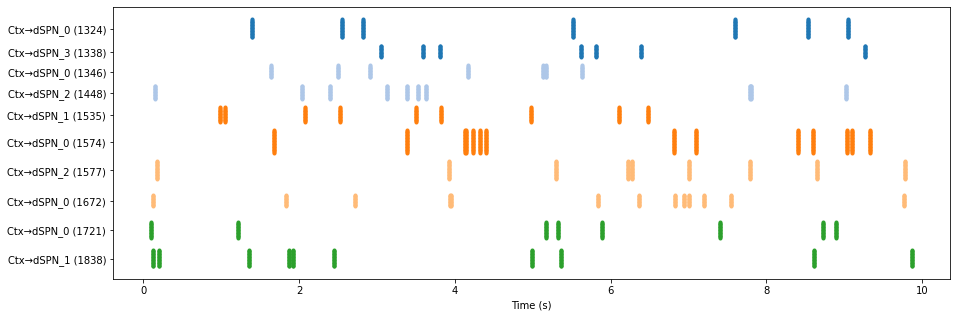

In [3]:
spi.plot_input_population_unit(population_unit_id=0, num_neurons=20, fig_size=(15,5))

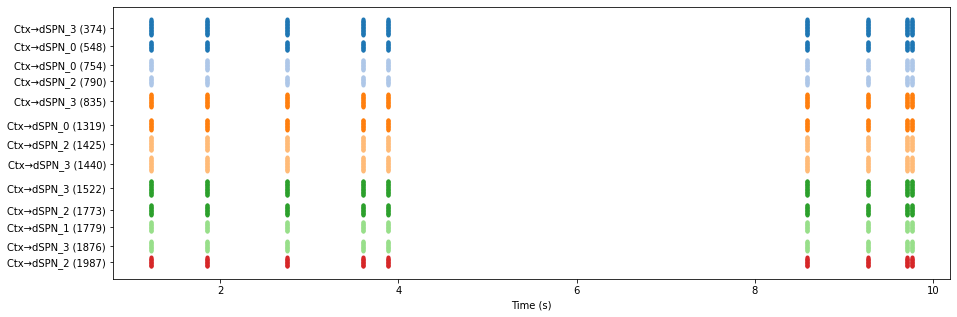

In [4]:
spi.plot_input_population_unit(population_unit_id=1, num_neurons=20, fig_size=(15,5))

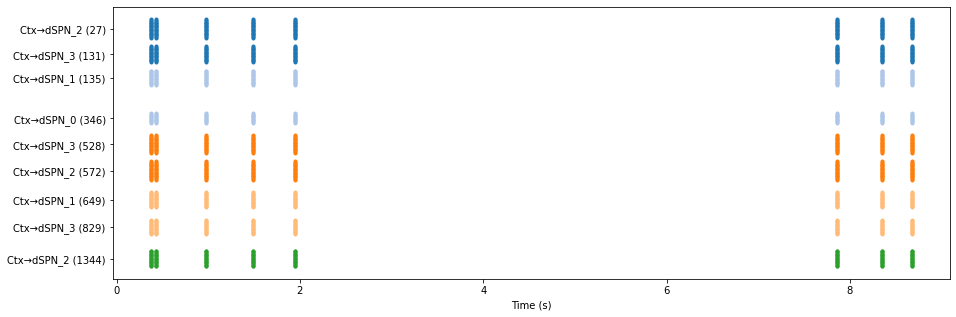

In [5]:
spi.plot_input_population_unit(population_unit_id=2, num_neurons=20, fig_size=(15,5))